In [25]:
import os
import datetime as dt
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision as tv

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

import lightning as L


In [4]:
tickers = [
    "AXP",
    "AMGN",
    "AAPL",
    "BA",
    "CAT",
    "CSCO",
    "CVX",
    "GS",
    "HD",
    "HON",
    "IBM",
    "INTC",
    "JNJ",
    "KO",
    "JPM",
    "MCD",
    "MMM",
    "MRK",
    "MSFT",
    "NKE",
    "PG",
    "TRV",
    "UNH",
    "CRM",
    "VZ",
    "V",
    "WBA",
    "WMT",
    "DIS",
    "DOW",
]
companies = [
    "American Express Co",
    "Amgen Inc",
    "Apple Inc",
    "Boeing Co",
    "Caterpillar Inc",
    "Cisco Systems Inc",
    "Chevron Corp",
    "Goldman Sachs Group Inc",
    "Home Depot Inc",
    "Honeywell International Inc",
    "International Business Machines Corp",
    "Intel Corp",
    "Johnson & Johnson",
    "Coca-Cola Co",
    "JPMorgan Chase & Co",
    "McDonald`s Corp",
    "3M Co",
    "Merck & Co Inc",
    "Microsoft Corp",
    "Nike Inc",
    "Procter & Gamble Co",
    "Travelers Companies Inc",
    "UnitedHealth Group Inc",
    "Salesforce Inc",
    "Verizon Communications Inc",
    "Visa Inc",
    "Walgreens Boots Alliance Inc",
    "Walmart Inc",
    "Walt Disney Co",
    "Dow Inc",
]

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [5]:
dow30_comps = pd.DataFrame()

dfs = []

for i in range(0,30):
    comp = pd.read_csv("dow30/"+ str(tickers[i]) + ".csv", delimiter = ",", decimal = ".",
        names = ['Date', str(tickers[i])], header = 0, index_col = "Date", parse_dates=True)

    dow30_comps = pd.merge(dow30_comps, comp, left_index = True, right_index=True, how = "outer")

# dow30_comps = dow30_comps[::-1]

# flip the axes
# dow30_comps = dow30_comps.transpose()
dow30_comps

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,...,PG,TRV,UNH,CRM,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,82.4862,128.146,24.6030,113.64,72.9602,21.6306,79.6307,168.606,86.2397,85.0994,...,71.7389,87.6229,89.2398,59.24,32.5344,62.6089,60.0756,72.2517,87.377,NaN
2015-01-05,80.3047,126.631,23.9110,112.87,69.1070,21.2005,76.4608,163.344,84.4242,83.4778,...,71.3935,86.5639,87.7692,58.17,32.2624,61.2261,58.8871,72.0425,86.100,NaN
2015-01-06,78.5938,122.554,23.9130,111.53,68.6632,21.1926,76.4217,160.031,84.1641,83.2828,...,71.0699,85.7815,87.5940,57.20,32.5868,60.8294,59.0377,72.5979,85.644,NaN
2015-01-07,80.3097,126.807,24.2521,113.27,69.7275,21.3890,76.3623,162.451,87.0610,83.8857,...,71.4459,87.2449,88.4922,56.93,32.3770,61.6476,60.5505,74.5233,86.520,NaN
2015-01-08,81.4471,126.386,25.1822,115.26,70.4437,21.5520,78.1052,165.029,88.9668,85.4096,...,72.2568,89.0608,92.7127,58.59,33.0704,62.4737,61.2998,76.0984,87.414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-12,174.3300,225.680,189.7700,217.11,253.6000,50.7400,159.6400,326.400,317.5200,208.5200,...,148.8500,171.1200,451.7000,227.28,34.8600,242.2100,30.3200,155.0400,90.150,54.11
2023-07-13,174.2400,227.660,190.5400,216.85,255.8600,51.5300,157.5100,328.680,314.6000,208.7100,...,148.9500,168.2200,447.7500,230.37,34.6400,243.3100,29.7400,154.1300,90.470,54.21
2023-07-14,173.3900,227.430,190.6900,213.12,255.6200,50.3800,153.5800,326.190,316.5000,206.1400,...,150.0500,165.9500,480.1700,229.33,34.0100,243.1600,29.2000,154.6600,88.620,52.92


                 AXP      AMGN      AAPL        BA       CAT      CSCO  \
Date                                                                     
2015-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2015-01-05 -0.026447 -0.011822 -0.028127 -0.006776 -0.052812 -0.019884   
2015-01-06 -0.021305 -0.032196  0.000084 -0.011872 -0.006422 -0.000373   
2015-01-07  0.021833  0.034703  0.014181  0.015601  0.015500  0.009267   
2015-01-08  0.014163 -0.003320  0.038351  0.017569  0.010271  0.007621   
...              ...       ...       ...       ...       ...       ...   
2023-07-12 -0.001775  0.008130  0.008986 -0.007543  0.002966 -0.026477   
2023-07-13 -0.000516  0.008773  0.004058 -0.001198  0.008912  0.015570   
2023-07-14 -0.004878 -0.001010  0.000787 -0.017201 -0.000938 -0.022317   
2023-07-17  0.011535  0.001803  0.017306 -0.005865  0.007198  0.008535   
2023-07-18  0.015109  0.020760 -0.001340 -0.001416  0.024664  0.008463   

                 CVX        GS       

<Axes: title={'center': 'Dow 30 Companies Returns'}, xlabel='Date'>

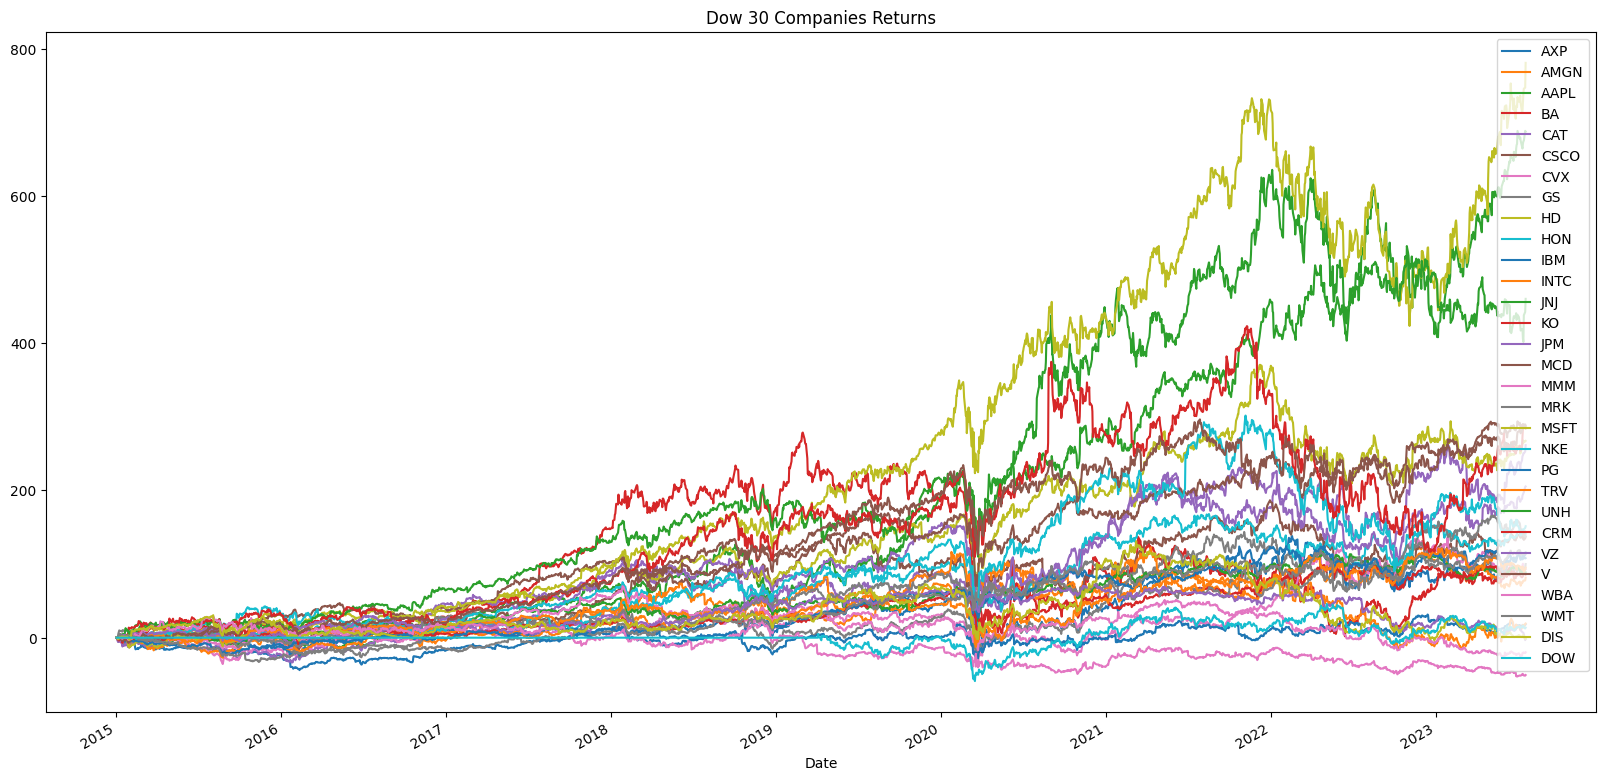

In [66]:
# turn dow_comps into returns data
dow30_comps_returns = dow30_comps.pct_change()
# replace nan with 0
dow30_comps_returns = dow30_comps_returns.fillna(0)
print(dow30_comps_returns)

dow30_comps_rets_cumprod = dow30_comps_returns.add(1).cumprod().sub(1)*100
dow30_comps_rets_cumprod.plot(figsize=(20, 10), title="Dow 30 Companies Returns")
# dow30_comps_rets_cumprod

In [7]:
ticker_dict = {}
for col_idx, ticker in enumerate(dow30_comps.columns):
    ticker_dict[col_idx] = ticker

print(ticker_dict)
ticker_dict.get(1)

{0: 'AXP', 1: 'AMGN', 2: 'AAPL', 3: 'BA', 4: 'CAT', 5: 'CSCO', 6: 'CVX', 7: 'GS', 8: 'HD', 9: 'HON', 10: 'IBM', 11: 'INTC', 12: 'JNJ', 13: 'KO', 14: 'JPM', 15: 'MCD', 16: 'MMM', 17: 'MRK', 18: 'MSFT', 19: 'NKE', 20: 'PG', 21: 'TRV', 22: 'UNH', 23: 'CRM', 24: 'VZ', 25: 'V', 26: 'WBA', 27: 'WMT', 28: 'DIS', 29: 'DOW'}


'AMGN'

In [8]:
dow30_comps_returns = dow30_comps_returns.transpose()
dow30_comps_returns

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2023-07-05,2023-07-06,2023-07-07,2023-07-10,2023-07-11,2023-07-12,2023-07-13,2023-07-14,2023-07-17,2023-07-18
AXP,0.0,-0.026447,-0.021305,0.021833,0.014163,-0.012673,-0.010193,-0.003005,-0.024151,-0.013701,...,0.000741,-0.026371,-0.006669,0.011249,0.017064,-0.001775,-0.000516,-0.004878,0.011535,0.015109
AMGN,0.0,-0.011822,-0.032196,0.034703,-0.003320,-0.012224,0.003132,-0.007330,0.000072,-0.020527,...,0.003866,-0.012839,-0.019419,0.027807,-0.003871,0.008130,0.008773,-0.001010,0.001803,0.020760
AAPL,0.0,-0.028127,0.000084,0.014181,0.038351,0.001068,-0.024836,0.009206,-0.003857,-0.027309,...,-0.005871,0.002509,-0.005891,-0.010856,-0.002810,0.008986,0.004058,0.000787,0.017306,-0.001340
BA,0.0,-0.006776,-0.011872,0.015601,0.017569,-0.001822,-0.004954,0.002009,-0.006102,-0.001667,...,0.011331,-0.003235,-0.002446,0.005705,0.025550,-0.007543,-0.001198,-0.017201,-0.005865,-0.001416
CAT,0.0,-0.052812,-0.006422,0.015500,0.010271,-0.011973,-0.008675,-0.005961,-0.003480,-0.012312,...,-0.010108,-0.017359,0.019120,0.014805,0.016237,0.002966,0.008912,-0.000938,0.007198,0.024664
CSCO,0.0,-0.019884,-0.000373,0.009267,0.007621,0.010161,0.009476,0.001829,-0.006468,-0.018272,...,-0.005982,-0.007765,-0.002348,0.008041,0.014008,-0.026477,0.015570,-0.022317,0.008535,0.008463
CVX,0.0,-0.039808,-0.000511,-0.000777,0.022824,-0.019892,-0.021533,-0.015911,-0.002938,-0.011785,...,-0.005725,-0.021944,0.008765,0.006679,0.018486,0.009613,-0.013343,-0.024951,-0.000912,0.002020
GS,0.0,-0.031209,-0.020282,0.015122,0.015869,-0.015325,-0.012185,-0.000791,-0.025481,-0.009533,...,-0.020085,-0.022028,0.006933,0.004125,0.013935,0.017203,0.006985,-0.007576,0.003096,0.030776
HD,0.0,-0.021052,-0.003081,0.034420,0.021890,-0.017130,-0.004254,-0.006796,-0.010531,-0.015804,...,0.002516,-0.028250,0.002616,0.024669,0.010893,0.012306,-0.009196,0.006039,-0.001422,0.002246
HON,0.0,-0.019055,-0.002336,0.007239,0.018166,-0.016539,-0.004844,0.007085,-0.004611,-0.015990,...,-0.008977,-0.011723,-0.003676,0.022041,0.004766,-0.001006,0.000911,-0.012314,0.009848,-0.014027


In [9]:
dow30 = pd.read_csv("indices/dow30.csv", delimiter = ",", decimal = ".", index_col='Date', parse_dates=True)

# switch the row order (from newest first to oldest first)
dow30 = dow30[::-1]
dow30

,Close
Date,
2015-01-02,17.0887
2015-01-05,16.1994
2015-01-06,15.7756
2015-01-07,16.3844
2015-01-08,17.2768
...,...
2023-07-12,59.3300
2023-07-13,59.4300
2023-07-14,60.0300


<Axes: title={'center': 'Dow Jones 30 Cumulative Returns'}, xlabel='Date'>

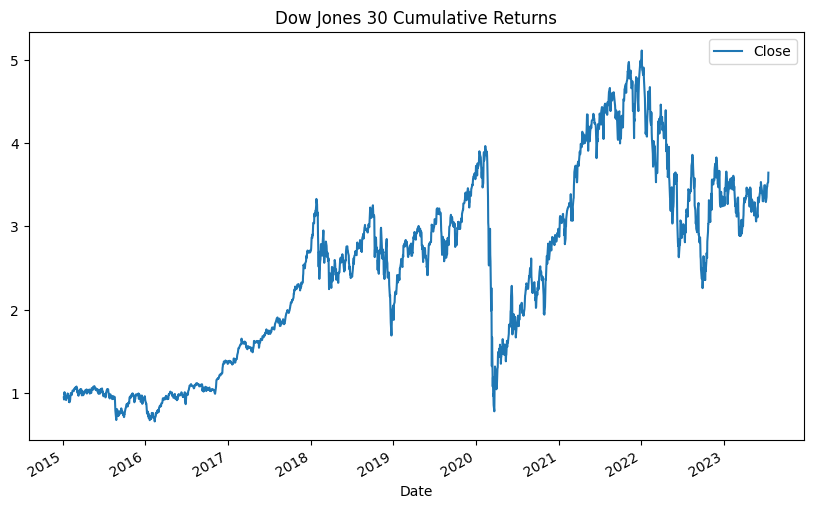

In [42]:
dow30_returns = dow30.pct_change()
dow30_cum_rets = (1+dow30_returns).cumprod()
dow30_cum_rets.plot(figsize=(10, 6), title='Dow Jones 30 Cumulative Returns')

In [10]:
vals = dow30_comps_returns.values
vals

array([[ 0.00000000e+00, -2.64468481e-02, -2.13051042e-02, ...,
        -4.87832874e-03,  1.15346906e-02,  1.51091852e-02],
       [ 0.00000000e+00, -1.18224525e-02, -3.21959078e-02, ...,
        -1.01027849e-03,  1.80275250e-03,  2.07601826e-02],
       [ 0.00000000e+00, -2.81266512e-02,  8.36435114e-05, ...,
         7.87236276e-04,  1.73055745e-02, -1.34027527e-03],
       ...,
       [ 0.00000000e+00, -2.89543360e-03,  7.70933824e-03, ...,
         3.43865568e-03,  1.22850123e-03, -1.80820149e-03],
       [ 0.00000000e+00, -1.46148300e-02, -5.29616725e-03, ...,
        -2.04487675e-02, -3.45294516e-02,  4.55820477e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.37963475e-02, -9.25925926e-03,  1.04901774e-02]])

In [11]:
# train_data, test_data = train_test_split(vals, test_size=0.2, random_state=42)
# get the first 27 rows of data from vals
train_data = dow30_comps_returns.head(27)
test_data = dow30_comps_returns.tail(3)
train_data.shape, test_data.shape

((27, 2149), (3, 2149))

In [12]:
from torch.utils.data import TensorDataset

full_dataset = TensorDataset(torch.Tensor(dow30_comps_returns.values))

train_dataset = TensorDataset(torch.Tensor(train_data.values))
test_dataset = TensorDataset(torch.Tensor(test_data.values))

train_loader = data.DataLoader(train_dataset, shuffle=True)

In [13]:
int(dt.datetime.strftime(start, "%Y%m%d%H%M%S"))

20150101000000

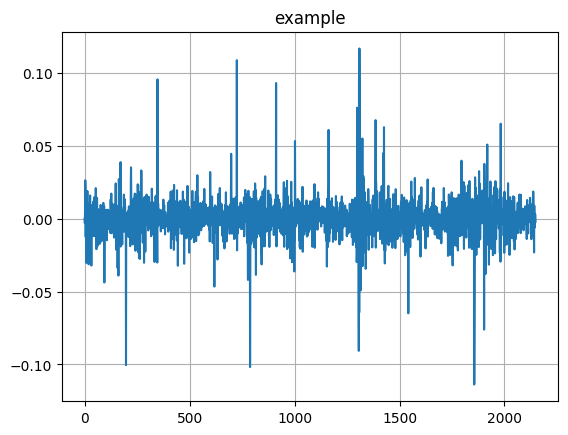

In [14]:
plt.grid()
plt.plot(test_dataset[0][0])
plt.title("example")
plt.show()

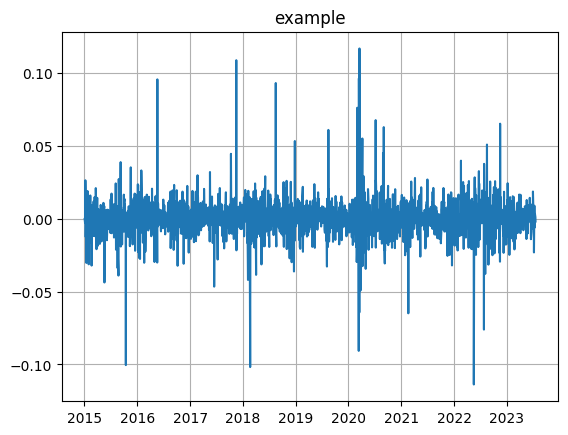

In [15]:
plt.grid()
plt.plot(test_data[:1].transpose())
plt.title("example")
plt.show()

In [16]:
encoder = nn.Sequential(
    nn.Linear(2149, 300), nn.ReLU(), nn.Linear(300, 30), nn.ReLU(), nn.Linear(30, 5)
)
decoder = nn.Sequential(
    nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 300), nn.ReLU(), nn.Linear(300, 2149), nn.Tanh()
)

In [17]:
class DeepAutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2149, 300),
            nn.Tanh(),
            nn.Linear(300, 30),
            nn.Tanh(),
            nn.Linear(30, latent_dim),
            nn.Tanh()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 30),
            nn.Tanh(),
            nn.Linear(30, 300),
            nn.Tanh(),
            nn.Linear(300, 2149),
            nn.Tanh()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

    # def configure_optimizers(self):
    #     return torch.optim.Adam(self.parameters(), lr=1e-3)

In [18]:
dae5 = DeepAutoEncoder(5).to("mps")
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(dae5.parameters(), lr=1e-3)

In [19]:
# train the model
num_epochs = 100
outputs = []

for epoch in range(num_epochs):
    dae5.train()
    for batch_idx, (features) in enumerate(train_loader):
        # forward pass: compute predicted outputs by passing inputs to the model
        x = features[0].to("mps")
        outputs = dae5(x)
        loss = criterion(outputs, x)
        # backward pass: compute gradient of the loss with respect to model parameters
        optimizer.zero_grad()
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        print(f"epoch {epoch} batch {batch_idx} loss {loss.item()}")

epoch 0 batch 0 loss 0.01206547487527132
epoch 0 batch 1 loss 0.005680501461029053
epoch 0 batch 2 loss 0.002810013946145773
epoch 0 batch 3 loss 0.0017014972399920225
epoch 0 batch 4 loss 0.0013225743314251304
epoch 0 batch 5 loss 0.0013627104926854372
epoch 0 batch 6 loss 0.0015161974588409066
epoch 0 batch 7 loss 0.001301131909713149
epoch 0 batch 8 loss 0.0012317025102674961
epoch 0 batch 9 loss 0.0012364716967567801
epoch 0 batch 10 loss 0.0010740134166553617
epoch 0 batch 11 loss 0.0009823087602853775
epoch 0 batch 12 loss 0.00065701047424227
epoch 0 batch 13 loss 0.000550085911527276
epoch 0 batch 14 loss 0.0006163770449347794
epoch 0 batch 15 loss 0.000577327620703727
epoch 0 batch 16 loss 0.0004953580209985375
epoch 0 batch 17 loss 0.00044247685582377017
epoch 0 batch 18 loss 0.0005511546041816473
epoch 0 batch 19 loss 0.0007808077498339117
epoch 0 batch 20 loss 0.00034944494836963713
epoch 0 batch 21 loss 0.0003708421136252582
epoch 0 batch 22 loss 0.0003001336008310318
epoch

In [20]:
# test model
trial = dae5(test_dataset[0][0].to("mps"))

trial1 = torch.Tensor.cpu(trial).detach().numpy()

trial2 = torch.Tensor.cpu(dae5(test_dataset[1][0].to("mps"))).detach().numpy()
trial2 = torch.Tensor.cpu(dae5(test_dataset[1][0].to("mps"))).detach().numpy()

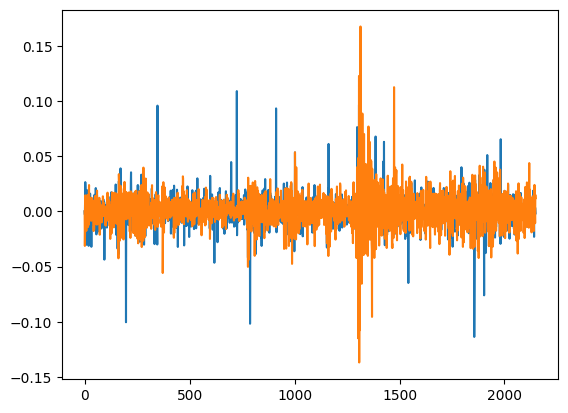

In [21]:
train1 = torch.Tensor.cpu(dae5(train_dataset[0][0].to("mps"))).detach().numpy()
plt.plot(test_dataset[0][0])
plt.plot(train1)


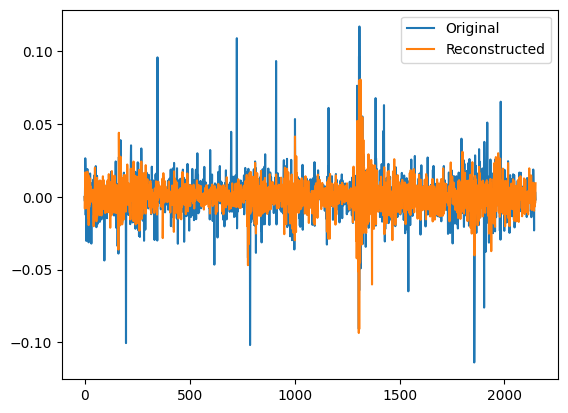

In [22]:
plt.plot(test_dataset[0][0])
plt.plot(trial1)
plt.legend(["Original", "Reconstructed"])

In [26]:
mean_squared_error(trial1, test_dataset[0][0])

0.00015150128

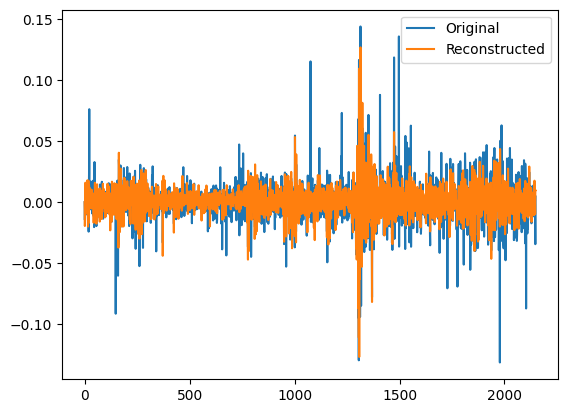

In [27]:
plt.plot(test_dataset[1][0])
plt.plot(trial2)
plt.legend(["Original", "Reconstructed"])

In [28]:
mean_squared_error(trial2, test_dataset[1][0])

0.00018279659

**Evaluating the MSE of all the stock price replications**

In [29]:
mse = {}
replications = []
for i in range(0, 30):
    
    replications.append(torch.Tensor.cpu(dae5(full_dataset[i][0].to("mps"))).detach().numpy())
    mse[ticker_dict.get(i)] = mean_squared_error(full_dataset[i][0].to("cpu"), replications[i])

print(mse)


{'AXP': 0.00011974532, 'AMGN': 0.0001126595, 'AAPL': 0.000120558536, 'BA': 1.8342482e-05, 'CAT': 0.00012522648, 'CSCO': 0.00011025983, 'CVX': 0.00015057903, 'GS': 9.030496e-05, 'HD': 0.00012532414, 'HON': 7.5650554e-05, 'IBM': 0.00011241108, 'INTC': 9.018506e-05, 'JNJ': 5.7850993e-05, 'KO': 6.488134e-05, 'JPM': 7.391476e-05, 'MCD': 8.481207e-05, 'MMM': 0.000105559935, 'MRK': 9.085712e-05, 'MSFT': 9.6787175e-05, 'NKE': 0.00019314073, 'PG': 7.0937465e-05, 'TRV': 0.00010480854, 'UNH': 0.00014984384, 'CRM': 8.3373736e-05, 'VZ': 9.168681e-05, 'V': 9.810726e-05, 'WBA': 2.0126612e-05, 'WMT': 0.00015150128, 'DIS': 0.00018279659, 'DOW': 0.0001877227}


**Chosing the 10 stocks with the highest information retention**

In [33]:
import heapq
# get 10 items in mse with lowest value
n = 10
smallest_items = heapq.nsmallest(n, mse.items(), key=lambda x: x[1])
print(smallest_items)

chosen_stocks = []

for tuple in smallest_items:
    chosen_stocks.append(tuple[0])

print(chosen_stocks)


[('BA', 1.8342482e-05), ('WBA', 2.0126612e-05), ('JNJ', 5.7850993e-05), ('KO', 6.488134e-05), ('PG', 7.0937465e-05), ('JPM', 7.391476e-05), ('HON', 7.5650554e-05), ('CRM', 8.3373736e-05), ('MCD', 8.481207e-05), ('INTC', 9.018506e-05)]
['BA', 'WBA', 'JNJ', 'KO', 'PG', 'JPM', 'HON', 'CRM', 'MCD', 'INTC']


**Chosing the 5 stocks with the least information retention**

In [34]:
import heapq
# get 10 items in mse with lowest value
n = 5
smallest_items = heapq.nlargest(n, mse.items(), key=lambda x: x[1])
print(smallest_items)

for tuple in smallest_items:
    chosen_stocks.append(tuple[0])

print(chosen_stocks)

[('NKE', 0.00019314073), ('DOW', 0.0001877227), ('DIS', 0.00018279659), ('WMT', 0.00015150128), ('CVX', 0.00015057903)]
['BA', 'WBA', 'JNJ', 'KO', 'PG', 'JPM', 'HON', 'CRM', 'MCD', 'INTC', 'NKE', 'DOW', 'DIS', 'WMT', 'CVX']


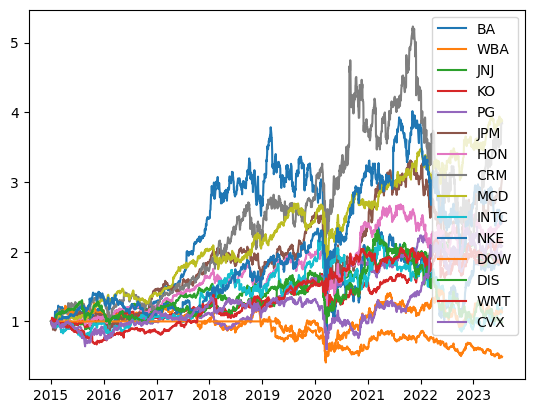

In [127]:
# get return data for the chosen stocks

chosen_stocks_rets = pd.DataFrame()
for stock in chosen_stocks:
    chosen_stocks_rets[stock] = dow30_comps_returns[stock]

chosen_stocks_cum_rets = (1 + chosen_stocks_rets).cumprod()
plt.plot(chosen_stocks_cum_rets)
plt.legend(chosen_stocks)

In [120]:
class WeightAllocationLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear((15*1500), 150),
            nn.ReLU(),
            nn.Linear(150, 15),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 15*1500)
        y_hat = self.model(x)
        return y_hat

In [130]:

weights_lin = WeightAllocationLinear()

weights = weights_lin(torch.Tensor(chosen_stocks_rets[:1500].transpose().values))
print(weights)
optimizer = torch.optim.Adam(weights_lin.parameters(), lr=0.001)
rets = torch.matmul(weights, torch.Tensor(chosen_stocks_rets[:1500].transpose().values))
rets

tensor([[0.0694, 0.0633, 0.0676, 0.0645, 0.0656, 0.0718, 0.0637, 0.0715, 0.0670,
         0.0667, 0.0633, 0.0677, 0.0648, 0.0620, 0.0710]],
       grad_fn=<SoftmaxBackward0>)


tensor([[ 0.0000, -0.0137, -0.0054,  ...,  0.0067, -0.0093,  0.0091]],
       grad_fn=<MmBackward0>)

**Loss function**

In [ ]:
fake = nn.Linear(in_features=10, out_features=10, bias=False)
print(fake.weight)
with torch.no_grad():
    fake.weight.fill_(0)
    for i in range(10):
        fake.weight[i][i] = 1
print(fake.weight.data)
# arr = np.array([[1., 2., 3., 4., 5., 6., 7., 8., 9., 10.], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
arr = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
# convert to float tensor
x = torch.tensor(arr, dtype=torch.float32)
fake(x)

Parameter containing:
tensor([[-0.1993, -0.1930, -0.2373, -0.1984, -0.3144,  0.1634, -0.3131,  0.1105,
         -0.2248,  0.2805],
        [ 0.2349, -0.0238, -0.0165,  0.1130, -0.0912,  0.1628, -0.0705,  0.1012,
         -0.0119,  0.1142],
        [-0.0263,  0.1946,  0.2108, -0.0946, -0.1815, -0.0250, -0.1083, -0.1753,
          0.3047,  0.0185],
        [ 0.2942, -0.1216, -0.2109, -0.1711, -0.2761,  0.1884, -0.2273, -0.2685,
          0.2109, -0.2645],
        [-0.1256,  0.2603,  0.1147, -0.2926, -0.0097,  0.1843,  0.0170,  0.0925,
          0.0665,  0.1854],
        [-0.1455, -0.0776, -0.0916,  0.2976, -0.0696, -0.1884, -0.1121, -0.1621,
          0.1794, -0.1926],
        [ 0.0844, -0.0061,  0.2666,  0.2726,  0.0043, -0.2160,  0.0854,  0.0053,
         -0.0644, -0.0733],
        [-0.0521, -0.3083,  0.1000, -0.1847, -0.1967, -0.2752, -0.0029,  0.1238,
          0.0011,  0.0398],
        [ 0.2985, -0.3141, -0.0362,  0.1040,  0.0872, -0.2782, -0.2515,  0.2825,
         -0.0197, -0.0600

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       grad_fn=<SqueezeBackward4>)

In [ ]:
for batch_idx, (features) in enumerate(train_loader):
    print(batch_idx)
    print(features)
    

0
[tensor([[ 0.0000, -0.0264, -0.0213,  ..., -0.0049,  0.0115,  0.0151]])]
1
[tensor([[ 0.0000,  0.0000,  0.0076,  ...,  0.0091, -0.0015, -0.0039]])]
2
[tensor([[ 0.0000, -0.0160, -0.0216,  ..., -0.0039,  0.0063,  0.0083]])]
3
[tensor([[ 0.0000, -0.0312, -0.0203,  ..., -0.0076,  0.0031,  0.0308]])]
4
[tensor([[ 0.0000, -0.0198,  0.0026,  ..., -0.0182, -0.0027,  0.0158]])]
5
[tensor([[ 0.0000, -0.0111,  0.0019,  ..., -0.0009, -0.0009, -0.0029]])]
6
[tensor([[ 0.0000, -0.0181, -0.0167,  ..., -0.0045, -0.0058, -0.0016]])]
7
[tensor([[ 0.0000, -0.0223, -0.0109,  ..., -0.0054, -0.0059,  0.0129]])]
8
[tensor([[ 0.0000, -0.0211, -0.0031,  ...,  0.0060, -0.0014,  0.0022]])]
9
[tensor([[ 0.0000, -0.0199, -0.0004,  ..., -0.0223,  0.0085,  0.0085]])]
10
[tensor([[ 0.0000, -0.0068, -0.0119,  ..., -0.0172, -0.0059, -0.0014]])]
11
[tensor([[ 0.0000, -0.0121, -0.0090,  ..., -0.0135,  0.0159,  0.0144]])]
12
[tensor([[ 0.0000, -0.0311, -0.0259,  ...,  0.0060,  0.0241,  0.0018]])]
13
[tensor([[ 0.0000, 

{0: 'AXP', 1: 'AMGN', 2: 'AAPL', 3: 'BA', 4: 'CAT', 5: 'CSCO', 6: 'CVX', 7: 'GS', 8: 'HD', 9: 'HON', 10: 'IBM', 11: 'INTC', 12: 'JNJ', 13: 'KO', 14: 'JPM', 15: 'MCD', 16: 'MMM', 17: 'MRK', 18: 'MSFT', 19: 'NKE', 20: 'PG', 21: 'TRV', 22: 'UNH', 23: 'CRM', 24: 'VZ', 25: 'V', 26: 'WBA', 27: 'WMT', 28: 'DIS', 29: 'DOW'}


'AMGN'